In [84]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [85]:
df = pd.read_csv('SMOKING_1990_2019_PCT_CHANGE.csv')

df

,measure_name,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,val,upper,lower
0,"% Change in Number of Smokers, 1990-2019",1,Global,1,Male,29,15+ years,0.183580,0.200438,0.166373
1,% Change in Age-Standardized Smoking Prevalenc...,1,Global,1,Male,29,15+ years,-0.275028,-0.265055,-0.285079
2,"% Change in Number of Smokers, 1990-2019",1,Global,2,Female,29,15+ years,0.027347,0.066359,-0.008666
3,% Change in Age-Standardized Smoking Prevalenc...,1,Global,2,Female,29,15+ years,-0.377422,-0.354123,-0.399461
4,"% Change in Number of Smokers, 1990-2019",1,Global,3,Both,29,15+ years,0.153779,0.169123,0.137887
...,...,...,...,...,...,...,...,...,...,...
1393,% Change in Age-Standardized Smoking Prevalenc...,522,Sudan,1,Male,29,15+ years,-0.122789,-0.005392,-0.229009
1394,"% Change in Number of Smokers, 1990-2019",522,Sudan,2,Female,29,15+ years,0.974147,1.960827,0.260124
1395,% Change in Age-Standardized Smoking Prevalenc...,522,Sudan,2,Female,29,15+ years,-0.151625,0.234372,-0.425484
1396,"% Change in Number of Smokers, 1990-2019",522,Sudan,3,Both,29,15+ years,1.012328,1.285242,0.767452


In [86]:
df = df[df.measure_name != '% Change in Age-Standardized Smoking Prevalence, 1990-2019']

df

,measure_name,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,val,upper,lower
0,"% Change in Number of Smokers, 1990-2019",1,Global,1,Male,29,15+ years,0.183580,0.200438,0.166373
2,"% Change in Number of Smokers, 1990-2019",1,Global,2,Female,29,15+ years,0.027347,0.066359,-0.008666
4,"% Change in Number of Smokers, 1990-2019",1,Global,3,Both,29,15+ years,0.153779,0.169123,0.137887
6,"% Change in Number of Smokers, 1990-2019",4,"Southeast Asia, East Asia, and Oceania",1,Male,29,15+ years,0.292153,0.324401,0.258622
8,"% Change in Number of Smokers, 1990-2019",4,"Southeast Asia, East Asia, and Oceania",2,Female,29,15+ years,0.412540,0.634433,0.204082
...,...,...,...,...,...,...,...,...,...,...
1388,"% Change in Number of Smokers, 1990-2019",435,South Sudan,2,Female,29,15+ years,0.525681,1.135804,0.045734
1390,"% Change in Number of Smokers, 1990-2019",435,South Sudan,3,Both,29,15+ years,0.201091,0.368975,0.048047
1392,"% Change in Number of Smokers, 1990-2019",522,Sudan,1,Male,29,15+ years,1.021245,1.307675,0.753659
1394,"% Change in Number of Smokers, 1990-2019",522,Sudan,2,Female,29,15+ years,0.974147,1.960827,0.260124


In [87]:
male_values = df.loc[df['sex_name']=='Male']['val']
female_values = df.loc[df['sex_name']=='Female']['val']

(-1.0, 4.0)

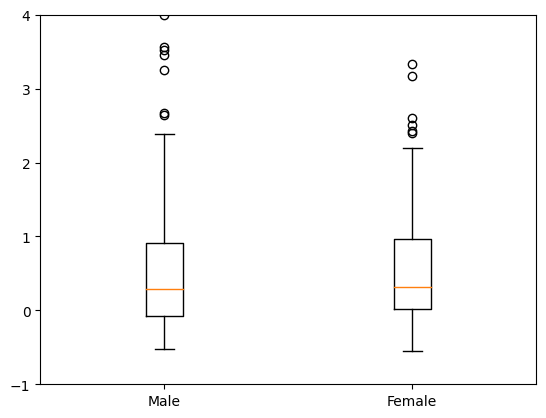

In [88]:
# plot sidebyside boxplots, hide outliers
plt.boxplot([male_values,female_values])
plt.xticks([1,2], ['Male', 'Female'])
plt.ylim([-1,4])

In [89]:
df.drop(['measure_name','age_group_name','location_name','sex_name'], inplace=True, axis=1)
df.corr()

/var/folders/zv/npgqrjp57ygbmvyh7zhqp9hc0000gn/T/ipykernel_93146/3581304398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['measure_name','age_group_name','location_name','sex_name'], inplace=True, axis=1)


,location_id,sex_id,age_group_id,val,upper,lower
location_id,1.000000e+00,3.772125e-16,NaN,0.113371,0.132677,0.085338
sex_id,3.772125e-16,1.000000e+00,NaN,0.000133,-0.001100,0.001253
age_group_id,NaN,NaN,NaN,NaN,NaN,NaN
val,1.133709e-01,1.331020e-04,NaN,1.000000,0.980364,0.976193
upper,1.326771e-01,-1.100409e-03,NaN,0.980364,1.000000,0.914521
lower,8.533780e-02,1.253356e-03,NaN,0.976193,0.914521,1.000000
